# Import necessary libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

In [52]:
# Load the dataset
data = pd.read_csv("US_Accidents_March23.csv")

# Info About The Dataset

In [53]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

None

In [54]:
display(data.head())

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# Data preprocessing

In [55]:
# Convert 'Start_Time' column to datetime format
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

In [56]:
# Drop rows with missing 'Start_Time' values
data.dropna(subset=['Start_Time'], inplace=True)

In [57]:
# Extract relevant features.
visibility = data['Visibility(mi)']
temperature = data['Temperature(F)']
wind_speed = data['Wind_Speed(mph)']
precipitation = data['Precipitation(in)']
weather_conditions = data['Weather_Condition']
time_of_day = data['Start_Time'].dt.hour

# Exploratory Data Analysis

In [58]:
# Descriptive statistics
print("Descriptive Statistics for Visibility:")
display(visibility.describe())

Descriptive Statistics for Visibility:


count    6.827127e+06
mean     9.093596e+00
std      2.706562e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64

In [59]:
print("\nDescriptive Statistics for Temperature:")
display(temperature.describe())


Descriptive Statistics for Temperature:


count    6.839140e+06
mean     6.168508e+01
std      1.892246e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      2.070000e+02
Name: Temperature(F), dtype: float64

In [60]:
print("\nDescriptive Statistics for Wind Speed:")
display(wind_speed.describe())


Descriptive Statistics for Wind Speed:


count    6.435855e+06
mean     7.696474e+00
std      5.411353e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

In [61]:
print("\nDescriptive Statistics for Precipitation:")
display(precipitation.describe())


Descriptive Statistics for Precipitation:


count    4.812697e+06
mean     8.824113e-03
std      1.170015e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.647000e+01
Name: Precipitation(in), dtype: float64

In [62]:
print("\nDescriptive Statistics for Weather Conditions:")
display(weather_conditions.describe())


Descriptive Statistics for Weather Conditions:


count     6829766
unique        143
top          Fair
freq      2206054
Name: Weather_Condition, dtype: object

# Data Visualizations

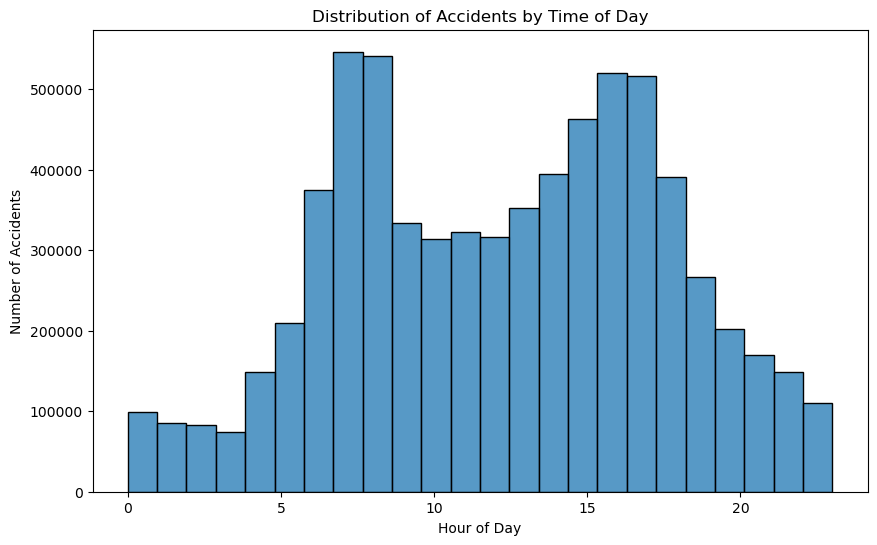

In [63]:
# Histogram for time of day
plt.figure(figsize = (10, 6))
sns.histplot(time_of_day, bins = 24, kde = False)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

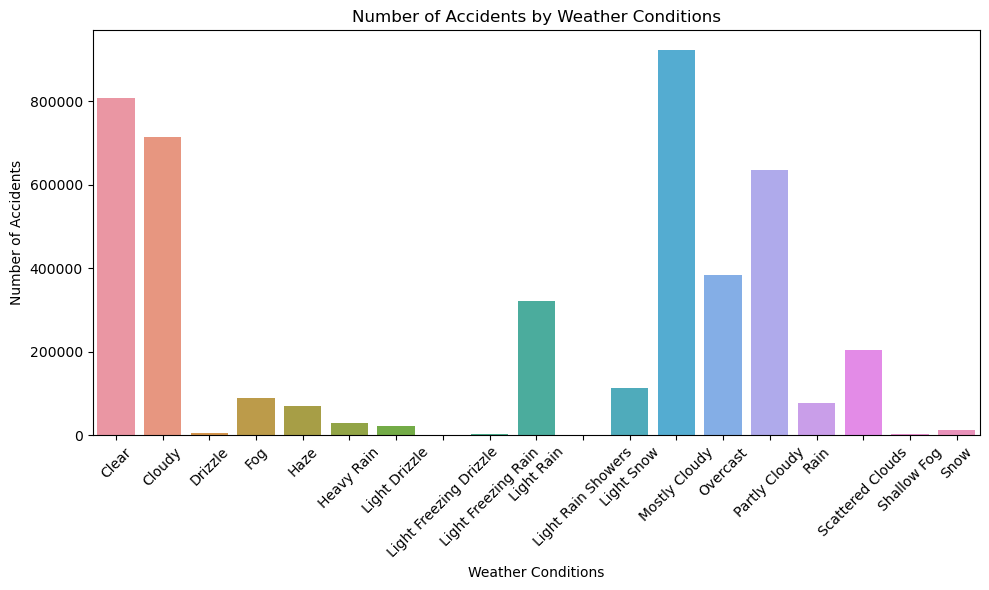

In [64]:
# List of weather conditions in the Dataset
weather_conditions = ['Clear',
                             'Cloudy',
                             'Drizzle',
                             'Fog',
                             'Haze',
                             'Heavy Rain',
                             'Light Drizzle',
                             'Light Freezing Drizzle',
                             'Light Freezing Rain',
                             'Light Rain',
                             'Light Rain Showers',
                             'Light Snow',
                             'Mostly Cloudy',
                             'Overcast',
                             'Partly Cloudy',
                             'Rain',
                             'Scattered Clouds',
                             'Shallow Fog',
                             'Snow']

# Filter the data to include only famous weather conditions
filtered_data = data[data['Weather_Condition'].isin(weather_conditions)]

# Bar plot for selected weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Weather_Condition', order = weather_conditions)
plt.title('Number of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()